### Dengue
#### Analyst: Ryann Kim Sesgundo

In [1]:
# import libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
data = pd.read_csv("datasets/dengue.csv")
data

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
data.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [4]:
data['Month'] = data['Month'].astype("category")
data['Region'] = data['Region'].astype("category")
data['Year'] = data['Year'].astype("category")


In [5]:
data.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [6]:
data.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

### 1. Months with most dengue cases

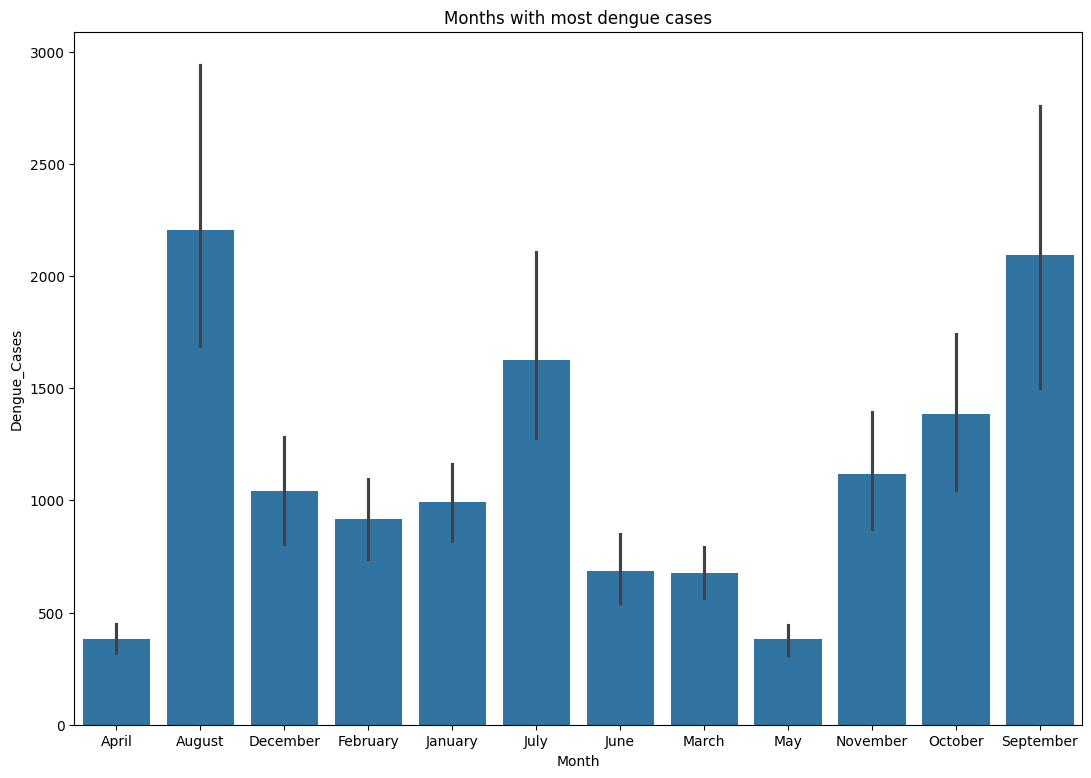

In [7]:
sns.barplot(data=data, x='Month', y='Dengue_Cases')
plt.gcf().set_size_inches(13, 9)
plt.title("Months with most dengue cases")
plt.show()

### 2. Region with most death cases

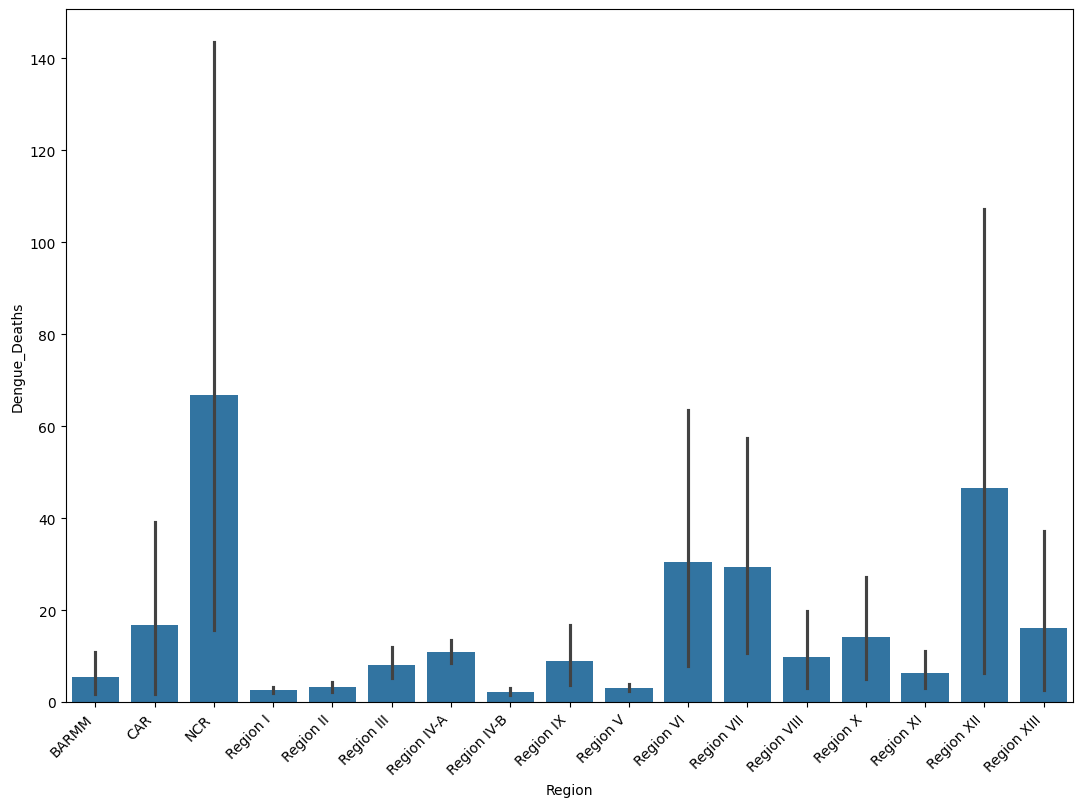

In [8]:
sns.barplot(data=data, x='Region', y='Dengue_Deaths')
plt.gcf().set_size_inches(13, 9)
plt.xticks(rotation=45, ha='right')
plt.show()

### 3. Year with mortality rate

/tmp/ipykernel_13959/746712824.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional = data.groupby(['Region', 'Year'])[['Dengue_Deaths', 'Dengue_Cases']].sum()


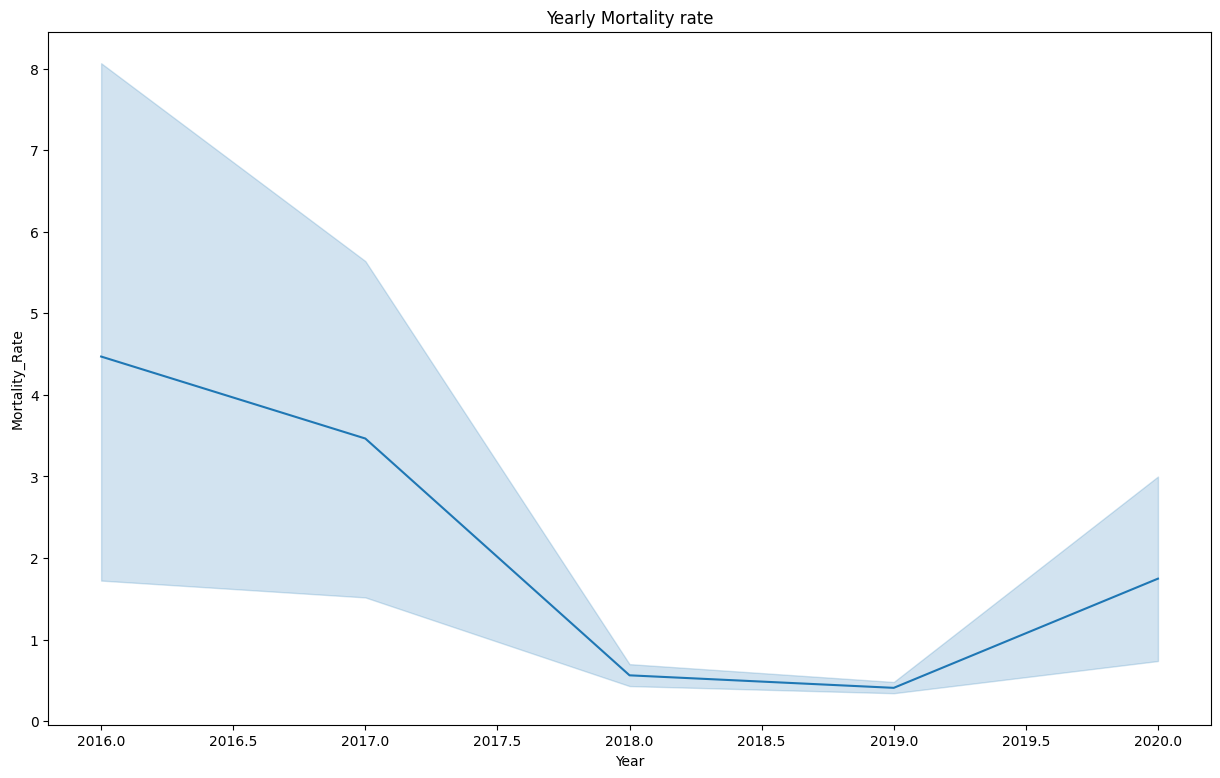

In [9]:
regional = data.groupby(['Region', 'Year'])[['Dengue_Deaths', 'Dengue_Cases']].sum()

regional['Mortality_Rate'] = np.round((regional['Dengue_Deaths'] / regional['Dengue_Cases']) * 100, 2)

sns.lineplot(data=regional, x='Year', y='Mortality_Rate')
plt.title("Yearly Mortality rate")
plt.gcf().set_size_inches(15, 9)
plt.show()

### 4. Regional Mortality Rate

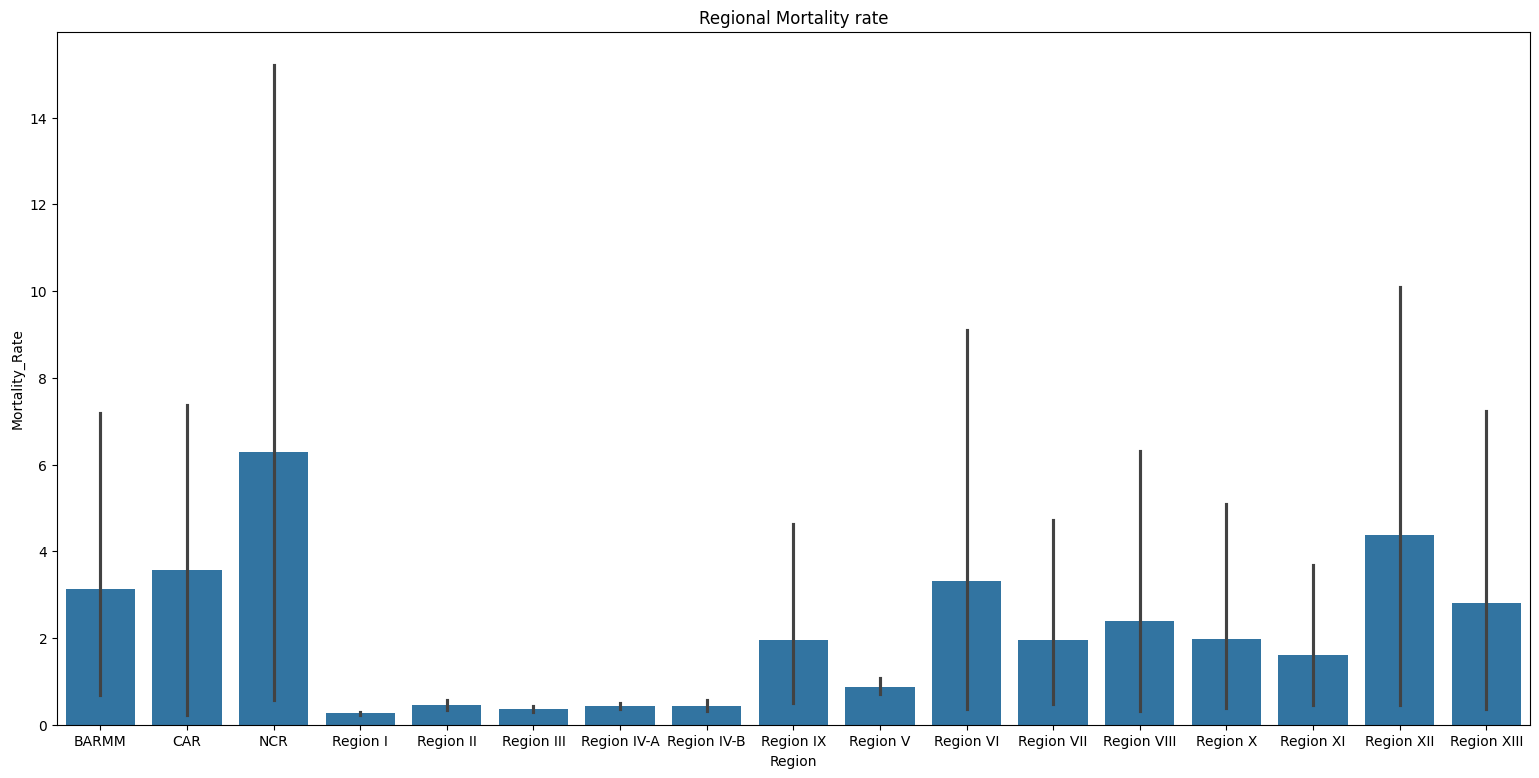

In [10]:
regional['Mortality_Rate'] = np.round((regional['Dengue_Deaths'] / regional['Dengue_Cases']) * 100, 2)

sns.barplot(data=regional, x='Region', y='Mortality_Rate')
plt.title("Regional Mortality rate")
plt.gcf().set_size_inches(19, 9)
plt.show()

### 5. Yearly Mortality Rate in the Philippines

/tmp/ipykernel_13959/2633795864.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly = data.groupby(['Year'])[['Dengue_Deaths', 'Dengue_Cases']].sum()


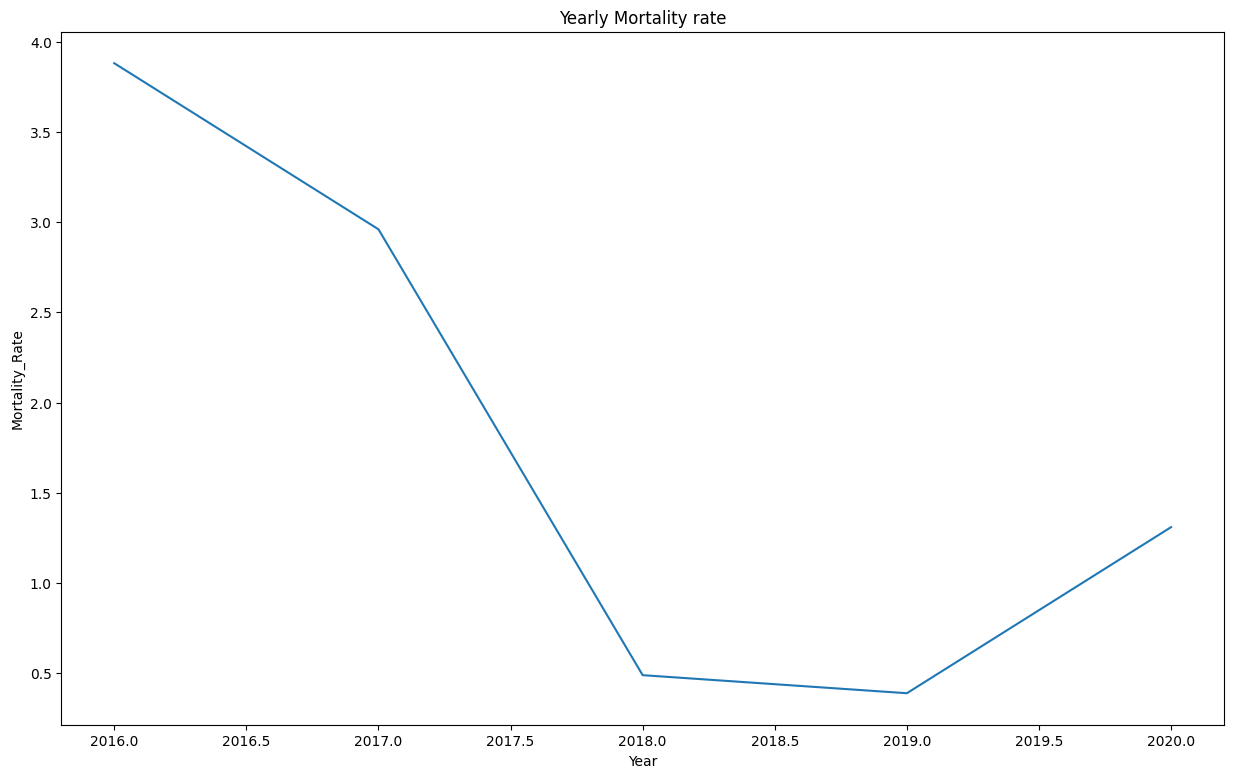

In [11]:
yearly = data.groupby(['Year'])[['Dengue_Deaths', 'Dengue_Cases']].sum()

yearly['Mortality_Rate'] = np.round((yearly['Dengue_Deaths'] / yearly['Dengue_Cases']) * 100, 2)

sns.lineplot(data=yearly, x='Year', y='Mortality_Rate', markers=True)
plt.title("Yearly Mortality rate")
plt.gcf().set_size_inches(15, 9)
plt.show()

### 6. Dengue Hostpots based on Cases per Year

/tmp/ipykernel_13959/235472967.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = data.groupby(['Region', 'Year'])[['Dengue_Cases', 'Dengue_Deaths']].sum()


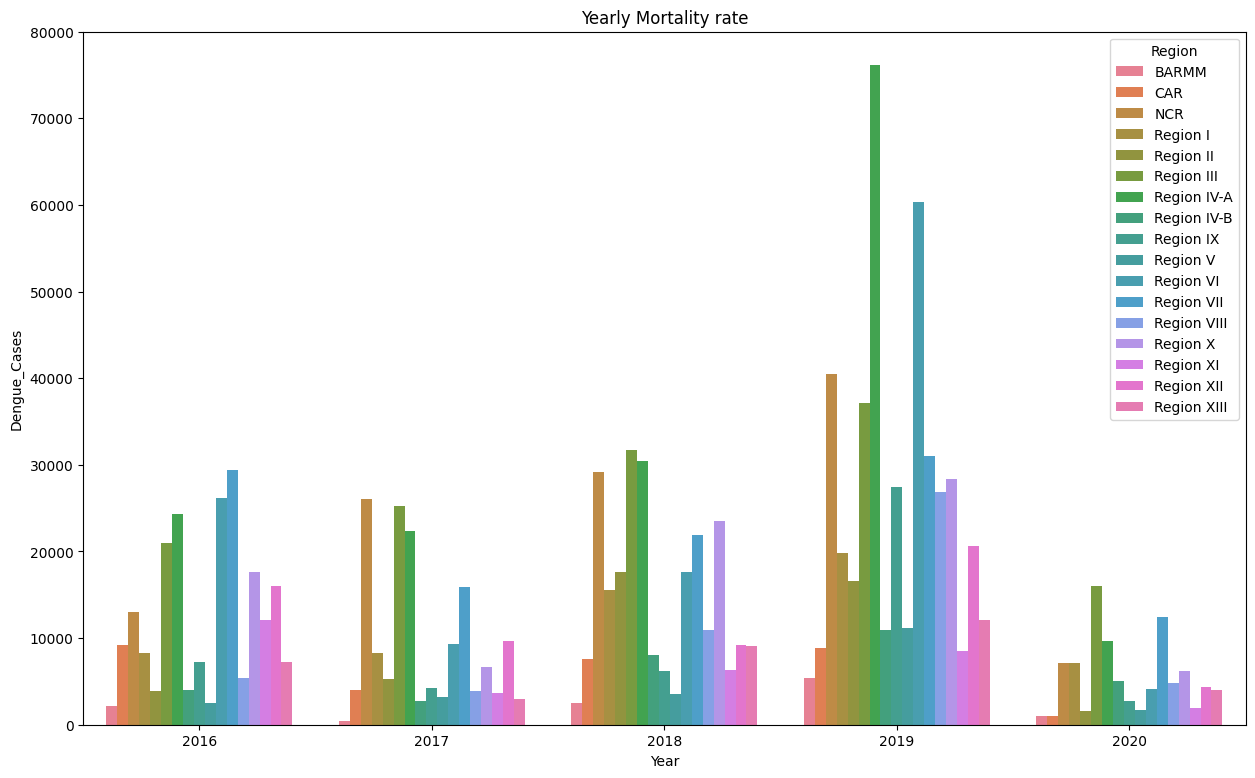

In [16]:
monthly = data.groupby(['Region', 'Year'])[['Dengue_Cases', 'Dengue_Deaths']].sum()

sns.barplot(data=monthly, x='Year', y='Dengue_Cases', hue='Region')
plt.title("Yearly Mortality rate")
plt.gcf().set_size_inches(15, 9)
plt.show()

### 7. Yearly Mortality Rate per Region

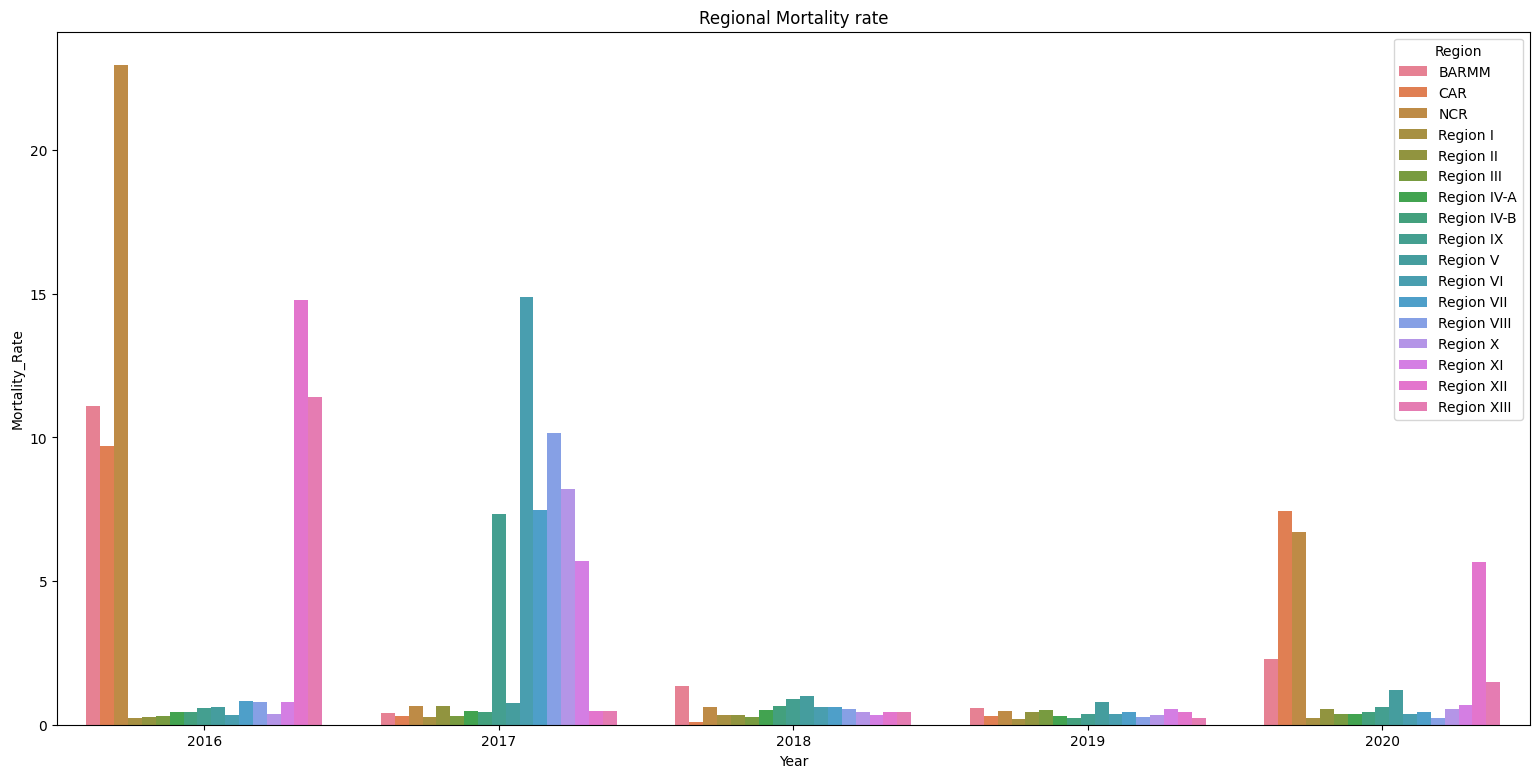

In [13]:
sns.barplot(data=regional, x='Year', y='Mortality_Rate', hue='Region')
plt.title("Regional Mortality rate")
plt.gcf().set_size_inches(19, 9)
plt.show()

### 8. 